In [44]:
#load 3 libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'png'

## EDA steps:

## 1- Sourcing Data

In [2]:
# Read data
df= pd.read_csv('test-travel.csv',index_col=0) 

In [3]:
#show frist five rows 
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 2- Cleaning Data

In [4]:
# Removes the spaces between the columns and replaces them with (_)
df.columns=df.columns.str.replace(' ','_')

In [5]:
#Delete id column 
df.drop(['id'], axis=1, inplace=True)

In [6]:
#Delete Departure/Arrival_time_convenient column
df.drop(['Departure/Arrival_time_convenient'], axis=1, inplace=True)

In [7]:
#Delete Gate_location column
df.drop(['Gate_location'], axis=1, inplace=True)

In [8]:
#Delete Seat_comfort column
df.drop(['Seat_comfort'], axis=1, inplace=True)

In [9]:
#Delete Inflight_entertainment column
df.drop(['Inflight_entertainment'], axis=1, inplace=True)

In [10]:
#Delete Baggage_handling column
df.drop(['Baggage_handling'], axis=1, inplace=True)

In [11]:
#Delete Checkin_service column
df.drop(['Checkin_service'], axis=1, inplace=True)

In [12]:
#Delete Food_and_drink column
df.drop(['Food_and_drink'], axis=1, inplace=True)

In [13]:
#Delete On-board_service column
df.drop(['On-board_service'], axis=1, inplace=True)

In [14]:
#Delete Flight_Distance column
df.drop(['Flight_Distance'], axis=1, inplace=True)

In [15]:
#Delete Leg_room_service column
df.drop(['Leg_room_service'], axis=1, inplace=True)

In [16]:
#Delete Cleanliness column
df.drop(['Cleanliness'], axis=1, inplace=True)

In [17]:
#Delete Cleanliness column
df.drop(['Online_boarding'], axis=1, inplace=True)

In [18]:
df.drop(['Inflight_service'], axis=1, inplace=True)

In [19]:
#show data details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      25976 non-null  object 
 1   Customer_Type               25976 non-null  object 
 2   Age                         25976 non-null  int64  
 3   Type_of_Travel              25976 non-null  object 
 4   Class                       25976 non-null  object 
 5   Inflight_wifi_service       25976 non-null  int64  
 6   Ease_of_Online_booking      25976 non-null  int64  
 7   Departure_Delay_in_Minutes  25976 non-null  int64  
 8   Arrival_Delay_in_Minutes    25893 non-null  float64
 9   satisfaction                25976 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [20]:
#view data type
df.dtypes

Gender                         object
Customer_Type                  object
Age                             int64
Type_of_Travel                 object
Class                          object
Inflight_wifi_service           int64
Ease_of_Online_booking          int64
Departure_Delay_in_Minutes      int64
Arrival_Delay_in_Minutes      float64
satisfaction                   object
dtype: object

In [21]:
# show data stats
df.describe()

,Age,Inflight_wifi_service,Ease_of_Online_booking,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,2.724746,2.756775,14.30609,14.740857
std,15.135685,1.335384,1.412951,37.42316,37.517539
min,7.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,2.000000,2.000000,0.00000,0.000000
50%,40.000000,3.000000,3.000000,0.00000,0.000000
75%,51.000000,4.000000,4.000000,12.00000,13.000000
max,85.000000,5.000000,5.000000,1128.00000,1115.000000


In [22]:
#view all null vaule
df.isnull().sum()

Gender                         0
Customer_Type                  0
Age                            0
Type_of_Travel                 0
Class                          0
Inflight_wifi_service          0
Ease_of_Online_booking         0
Departure_Delay_in_Minutes     0
Arrival_Delay_in_Minutes      83
satisfaction                   0
dtype: int64

In [23]:
#show number of rows and columns
df.shape

(25976, 10)

In [24]:
#Delete all null values in this column 
df.dropna(subset=["Arrival_Delay_in_Minutes"], inplace=True)

In [25]:
#show the number of rows and columns
df.dropna(subset=["Arrival_Delay_in_Minutes"]).shape

(25893, 10)

In [43]:
#cleaning all null value
df.isnull().sum()

Gender                        0
Customer_Type                 0
Age                           0
Type_of_Travel                0
Class                         0
Inflight_wifi_service         0
Ease_of_Online_booking        0
Departure_Delay_in_Minutes    0
Arrival_Delay_in_Minutes      0
satisfaction                  0
dtype: int64

In [26]:
#show the number of rows and columns
df.shape

(25893, 10)

## 3- Visualizations

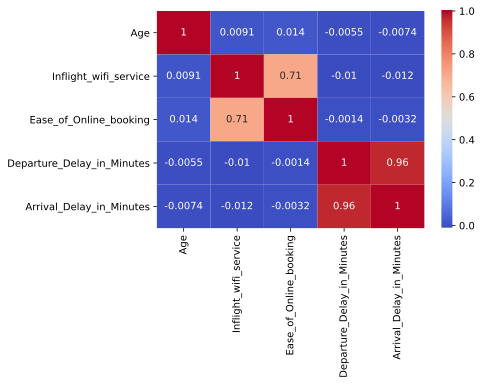

In [27]:
#show relationships between data 
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

## Q1: What is the most preferred class of travel for customers traveling ?

In [28]:
#Returns the unique numbers for the column
df['Type_of_Travel'].nunique()

2

In [29]:
#Returns the unique values for the column
df['Type_of_Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [30]:
#the number of values in this column
df['Type_of_Travel'].value_counts()

Business travel    17980
Personal Travel     7913
Name: Type_of_Travel, dtype: int64

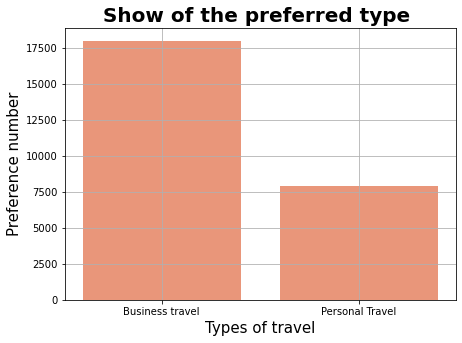

In [45]:
plt.figure(figsize=[7,5])
type_of_travel=['Business travel','Personal Travel']
very_frq=[17980,7913]
plt.grid()
plt.bar(type_of_travel,very_frq,color=['#E9967A']);
plt.xlabel('Types of travel',fontsize = 15)
plt.ylabel('Preference number',fontsize = 15);
plt.title('Show of the preferred type ',fontsize = 20, weight = 'bold');
plt.savefig('SDAIA.png')

## Q2: Are customers satisfied with the Online booking of the airline on which their flights are booked ?

In [32]:
df['Ease_of_Online_booking'].value_counts()

2    6021
3    5927
4    4854
1    4342
5    3556
0    1193
Name: Ease_of_Online_booking, dtype: int64

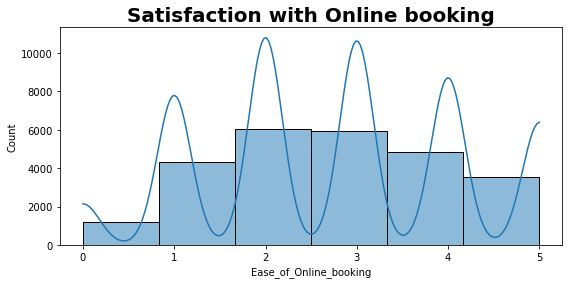

In [65]:
plt.figure(figsize=(9,4))
sns.histplot(df['Ease_of_Online_booking'],bins=6, kde=True);
plt.title('Satisfaction with Online booking',fontsize = 20, weight = 'bold');
plt.savefig('SDAIA.png')

In [61]:
df['Age'].value_counts()

39    720
25    711
40    634
41    631
43    625
     ... 
75     15
74     14
78     11
79     10
85      8
Name: Age, Length: 75, dtype: int64

## Q3:What is the satisfaction rate of people with airline?

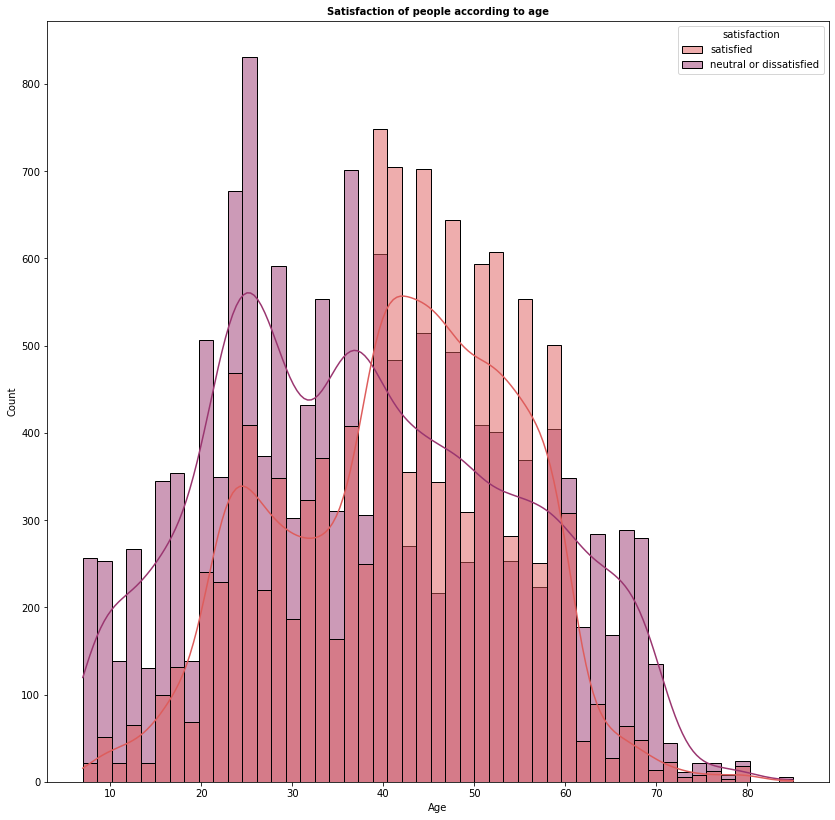

In [54]:
plt.figure(figsize=(14,14))
plt.title('Satisfaction of people according to age',fontsize = 10, weight = 'bold');
sns.histplot(x='Age',hue="satisfaction",data=df,kde=True,palette="flare");
plt.savefig('SDAIA.png')

## Q4:who are more loyal customers does the airline have?

In [35]:
df['Customer_Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [36]:
#group by between two columns 
df.groupby('Customer_Type').Gender.value_counts()

Customer_Type      Gender
Loyal Customer     Female    10563
                   Male      10548
disloyal Customer  Female     2564
                   Male       2218
Name: Gender, dtype: int64

In [37]:
#create two data frame form customer type column 
df1= df[(df.Customer_Type=='Loyal Customer')]
df2= df[(df.Customer_Type=='disloyal Customer')]

In [38]:
df1

,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Ease_of_Online_booking,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,5,3,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,1,3,0,0.0,satisfied
3,Male,Loyal Customer,44,Business travel,Business,0,0,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...
25969,Male,Loyal Customer,52,Business travel,Business,3,3,0,0.0,satisfied
25972,Male,Loyal Customer,23,Business travel,Business,4,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,2,1,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,3,3,0,0.0,satisfied


In [39]:
df2

,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Ease_of_Online_booking,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
2,Male,disloyal Customer,20,Business travel,Eco,2,2,0,0.0,neutral or dissatisfied
24,Female,disloyal Customer,30,Business travel,Eco,4,5,0,0.0,neutral or dissatisfied
32,Male,disloyal Customer,41,Business travel,Eco,2,2,0,0.0,neutral or dissatisfied
38,Female,disloyal Customer,32,Business travel,Business,4,4,0,10.0,neutral or dissatisfied
40,Female,disloyal Customer,42,Business travel,Business,3,3,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...
25962,Female,disloyal Customer,21,Business travel,Eco,4,4,0,0.0,neutral or dissatisfied
25966,Male,disloyal Customer,42,Business travel,Eco,4,4,0,17.0,neutral or dissatisfied
25967,Female,disloyal Customer,39,Business travel,Business,1,1,0,0.0,neutral or dissatisfied
25970,Female,disloyal Customer,36,Business travel,Eco,1,1,0,0.0,neutral or dissatisfied


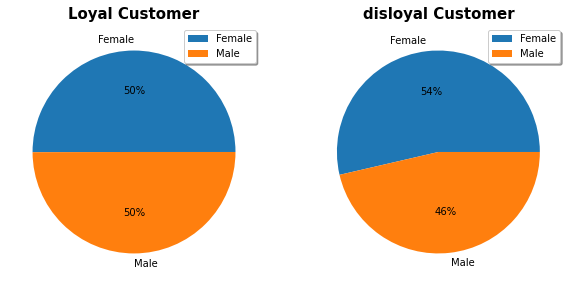

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Loyal Customer',fontsize = 15, weight = 'bold');
new_x = df1.groupby('Customer_Type').Gender.value_counts()
plt.pie(new_x,labels=['Female','Male'],autopct='%1.0f%%');
plt.legend(['Female','Male'],shadow=True,loc=0)
plt.subplot(1,2,2)
plt.title('disloyal Customer',fontsize = 15, weight = 'bold');
new_x = df2.groupby('Customer_Type').Gender.value_counts()
plt.pie(new_x,labels=['Female','Male'], autopct='%1.0f%%');
plt.legend(['Female','Male'],shadow=True,loc=0);
plt.savefig('SDAIA.png')